<a href="https://colab.research.google.com/github/sagarkumarmishra/Data-Science-project/blob/complete-univariate-analysis/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import seaborn as sn

In [45]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/test.csv')

In [46]:

train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [47]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [48]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [49]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [50]:

train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [51]:
train.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


Univariate Analysis


In [52]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [53]:

train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

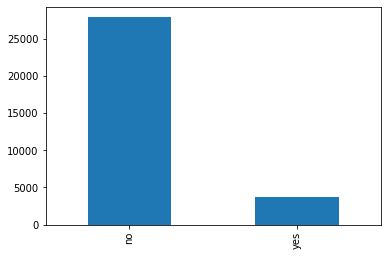

In [54]:

train['subscribed'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


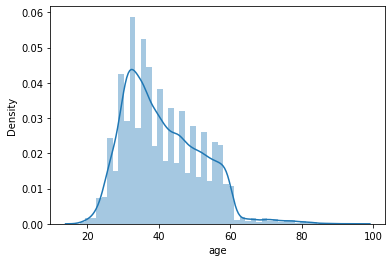

In [55]:

sns.distplot(train['age'])

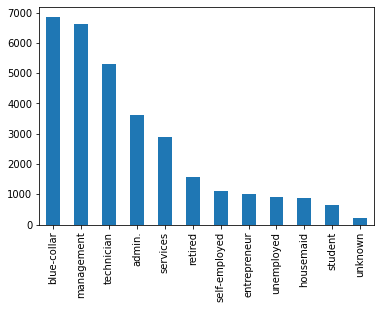

In [56]:
train['job'].value_counts().plot.bar()

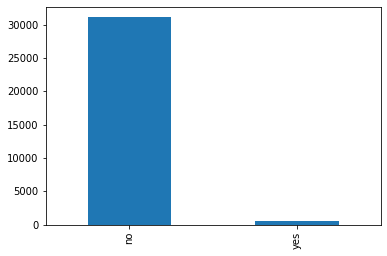

In [57]:
train['default'].value_counts().plot.bar()

In [58]:
job=pd.crosstab(train['job'],train['subscribed'])

In [59]:

job

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


Text(0, 0.5, 'Percentage')

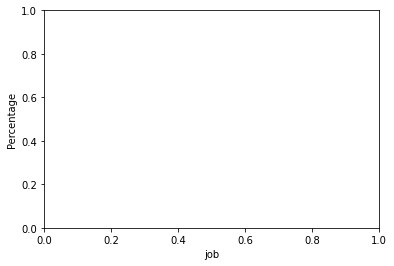

In [60]:
job=pd.crosstab(train['job'],train['subscribed'])
plt.xlabel('job')
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

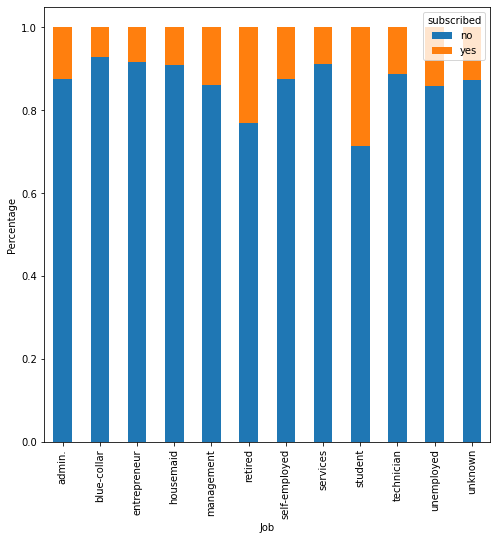

In [61]:

job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [62]:
default=pd.crosstab(train['default'],train['subscribed'])

In [63]:

default

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


Text(0, 0.5, 'subscribed')

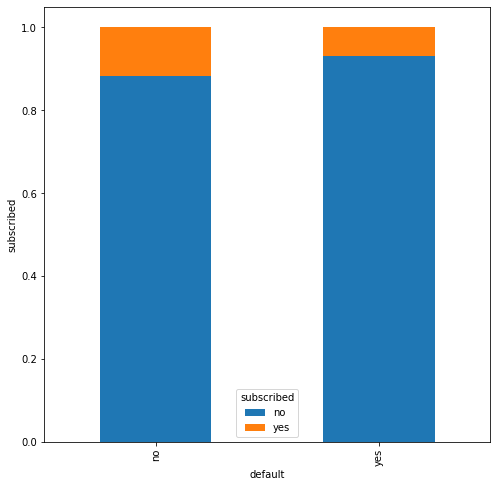

In [64]:
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('subscribed')

In [65]:

train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [66]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [67]:
corr=train.corr()

In [68]:
corr

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


In [69]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)]= False                                                #ask

In [70]:
mask

array([[ 0.        ,  0.01333693,  0.06789654, -0.063399  ,  0.00718339,
        -0.10350763,  0.43614761,  0.254476  ,  0.29666293],
       [ 0.        ,  0.        ,  0.10324487, -0.01105616, -0.00386981,
         0.00573254, -0.02194718,  0.00576139,  0.02453815],
       [ 0.        ,  0.        ,  0.        ,  0.00346138,  0.02427431,
        -0.01203199,  0.0017886 ,  0.01384285,  0.05080689],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.03228819,
         0.15916818, -0.08762588, -0.0487519 , -0.02959954],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.0803046 ,  0.0005295 ,  0.00178274,  0.38983813],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.08757002, -0.03315131, -0.07060652],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.42893798,  0.10828952],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

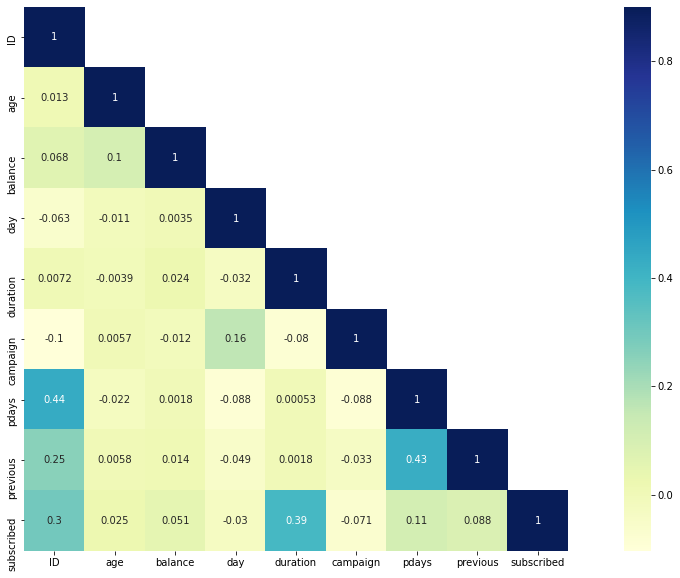

In [71]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr,mask=mask,vmax=.9,square=True,annot=True,cmap="YlGnBu")

## Model **Building**


In [72]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [75]:
train = pd.get_dummies(train)

In [77]:
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [78]:
from sklearn.model_selection import train_test_split


In [85]:
x_train,x_val,y_train,y_val = train_test_split(train,targret,test_size = 0.2,random_state = 12)

**Logistic Regression**

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lreg = LogisticRegression

In [103]:
clf = LogisticRegression